In [8]:
% load_ext autoreload
% autoreload 2

UsageError: Line magic function `%` not found.


In [9]:
import sys

sys.path.append('/home/labs/amit/noamsh/repos/sc_clustering')

In [11]:
from pathlib import Path
import scanpy as sc
import pandas as pd
import shutil

from sklearn.metrics import silhouette_score

import config
from embedding.load_hierarchically_trained_scvi import load_adatas_from_experiment

In [12]:
experiment_name = "hierarchical_scvi_2021_11_25__10_00_49"
results_dir = Path(config.RESULTS_DIR, experiment_name)

copy_results_to_dir = False
if copy_results_to_dir:
    source_labeled_adata_path = Path(config.ASAF_META_CELL_ATLAS_DIR_PATH, "scanpy_metacells.h5ad")
    new_labeled_adata_path = Path(results_dir, "scanpy_metacells.h5ad")
    shutil.copyfile(new_labeled_adata_path, new_labeled_adata_path)

PermissionError: [Errno 13] Permission denied: '/home/labs/amit/weiner/Serono/Serono14/clustering_results/simple_clustering_2021_09_05__15_04_43/scanpy_metacells.h5ad'

In [13]:
full_adata, adata_with_labels_on_metacells, clusters_adatas, embedding_col_names = load_adatas_from_experiment('hierarchical_scvi_2021_11_18__10_10_08')

In [15]:
for adata in [full_adata] + list(clusters_adatas.values()):
    adata.obs = pd.merge(left=adata.obs.astype({"metacell": "str"}).reset_index(),
                         right=adata_with_labels_on_metacells.obs[["cell_type", "broad_cell_type"]].reset_index().rename(
                             columns={"index": "mc_num"}),
                         left_on="metacell", right_on="mc_num", how="left", validate="m:1").set_index("index")

full_adata

In [16]:
sc.pp.neighbors(full_adata, use_rep=embedding_col_names["full"])

... storing 'metacell' as categorical
... storing 'mc_num' as categorical


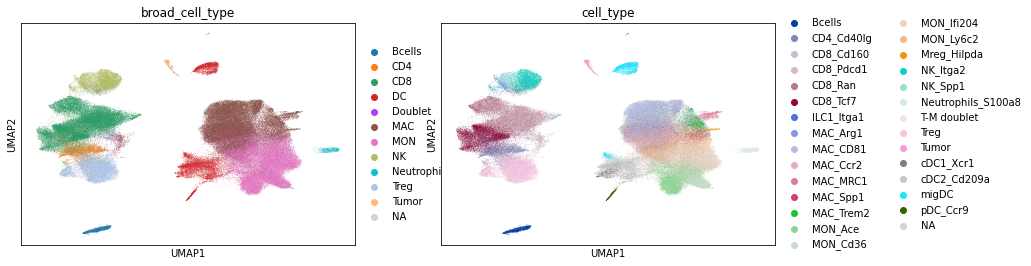

In [17]:
sc.tl.umap(full_adata, min_dist=0.3)
sc.pl.umap(full_adata, color=["broad_cell_type", "cell_type"])

cluster 0

In [19]:
cluster_name = "cluster_0"
cluster_0_adata = clusters_adatas[cluster_name]
sc.pp.neighbors(cluster_0_adata, use_rep=embedding_col_names[cluster_name])

... storing 'metacell' as categorical
... storing 'mc_num' as categorical


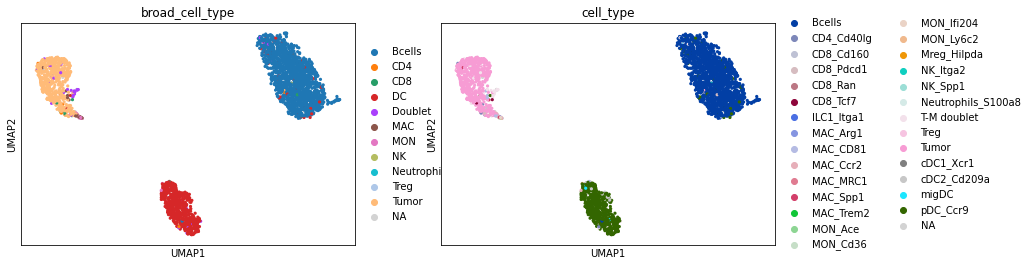

In [20]:
sc.tl.umap(cluster_0_adata, min_dist=0.3)
sc.pl.umap(cluster_0_adata, color=["broad_cell_type", "cell_type"])

cluster 1

In [21]:
cluster_name = "cluster_1"
cluster_1_adata = clusters_adatas[cluster_name]
sc.pp.neighbors(cluster_1_adata, use_rep=embedding_col_names[cluster_name], n_neighbors=10)
sc.tl.umap(cluster_1_adata, min_dist=0.3)

... storing 'metacell' as categorical
... storing 'mc_num' as categorical


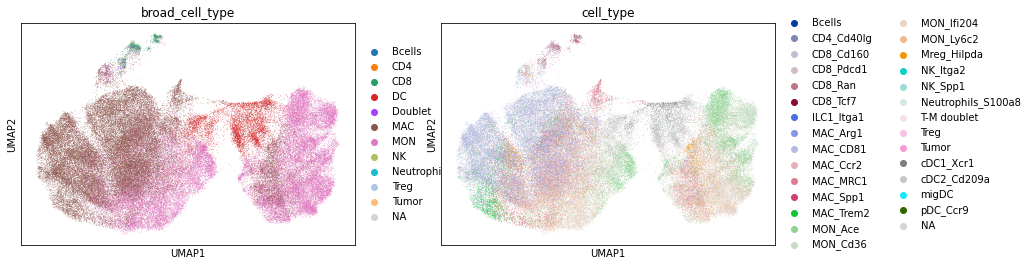

In [22]:
sc.pl.umap(cluster_1_adata, color=["broad_cell_type", "cell_type"])

cluster 2

In [23]:
cluster_name = "cluster_2"
cluster_2_adata = clusters_adatas[cluster_name]
sc.pp.neighbors(cluster_2_adata, use_rep=embedding_col_names[cluster_name], n_neighbors=10)
sc.tl.umap(cluster_2_adata, min_dist=0.3)

... storing 'metacell' as categorical
... storing 'mc_num' as categorical


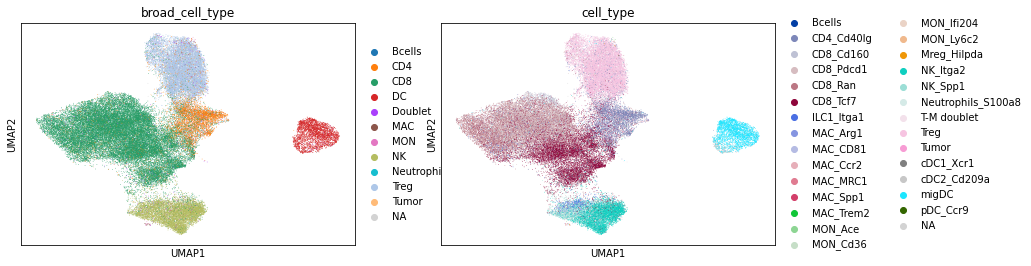

In [24]:
sc.pl.umap(cluster_2_adata, color=["broad_cell_type", "cell_type"])

cluster 3

In [25]:
cluster_name = "cluster_3"
cluster_3_adata = clusters_adatas[cluster_name]
sc.pp.neighbors(cluster_3_adata, use_rep=embedding_col_names[cluster_name], n_neighbors=10)
sc.tl.umap(cluster_3_adata, min_dist=0.3)

... storing 'metacell' as categorical
... storing 'mc_num' as categorical


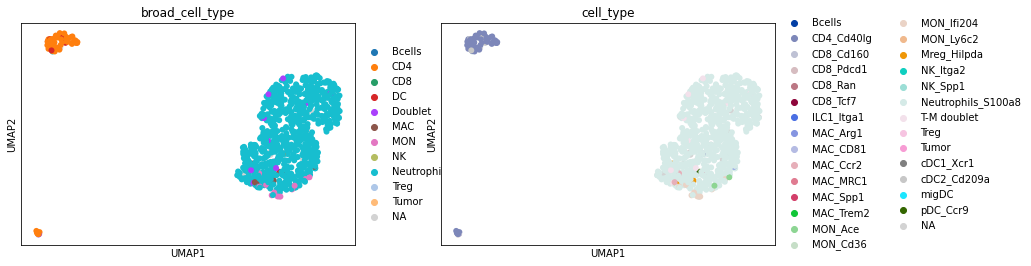

In [26]:
sc.pl.umap(cluster_3_adata, color=["broad_cell_type", "cell_type"])

In [17]:
for adata, emb_col_name in zip:
    silhouette_score(full_adata.obsm[embedding_col_names["full"]], labels=list(full_adata.obs["broad_cell_type"]))

0.10560876